In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas_datareader as data

In [5]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433318
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [6]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.738731
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.122360
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.095383
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.517342
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.039886


In [7]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433318
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [9]:
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


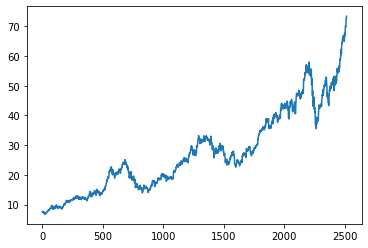

In [10]:
plt.plot(df.Close)

In [11]:
##moving avearge 100 upto 100 NAN
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

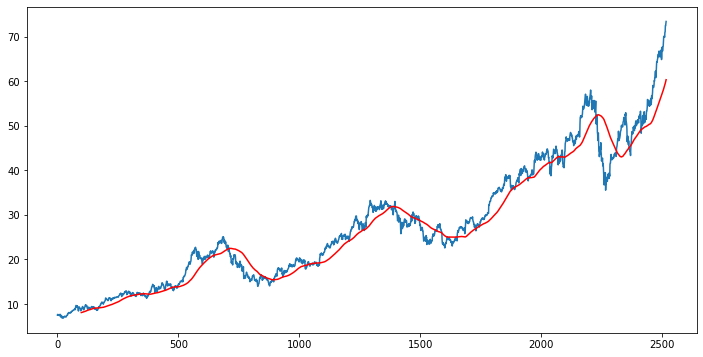

In [12]:
###ploting moving average 100 and close
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [13]:
## moving average 200
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

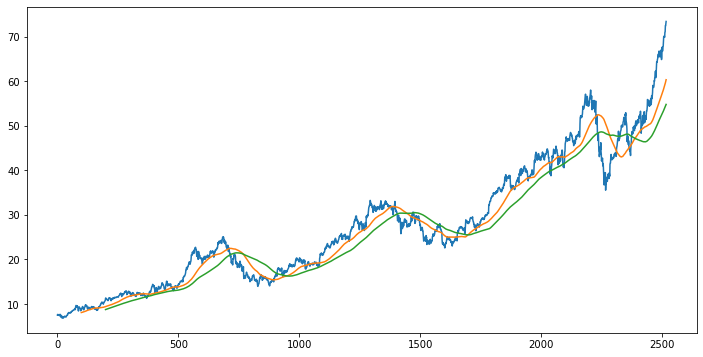

In [14]:
##ploting ma100 and ma200 for comparision
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100)
plt.plot(ma200)

In [16]:
df.shape

(2517, 5)

In [19]:
###spliting data into training and testing
## trainign 70 % of total data
##testing 30% of total data...working only on closing column
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [20]:
data_training.head()
data_training.tail()

,Close
1756,29.264999
1757,29.072500
1758,29.129999
1759,29.315001
1760,29.190001


In [21]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [23]:
###for lstm model we will have to scale down data between 0 and 1
###processing data  between 0 and 1 using sklearn preprocessing MinMaxScaller
from sklearn.preprocessing import MinMaxScaler

###defining object of MInMaxscaler and feature range between 0 and 1 
scaler = MinMaxScaler(feature_range=(0,1))

In [24]:
##fit training data into min_max_sacaler and return as an array
data_training_array = scaler.fit_transform(data_training)
data_training_array


array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [27]:
data_training_array.shape

(1761, 1)

In [43]:
###x train for getting y_train   y train is dependent on first 100 for our case.
###..last one eleemtn of x_train remove and first eleemnt of y_train add each time
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
### converting x_train list and y_train list into array
# x_train
x_train = np.array(x_train)
y_train = np.array(y_train)


In [31]:
x_train

array([[[0.02527908],
        [0.02971782],
        [0.03021854],
        ...,
        [0.06802896],
        [0.07403745],
        [0.07195343]],

       [[0.02971782],
        [0.03021854],
        [0.02560389],
        ...,
        [0.07403745],
        [0.07195343],
        [0.07045129]],

       [[0.03021854],
        [0.02560389],
        [0.02507608],
        ...,
        [0.07195343],
        [0.07045129],
        [0.08295551]],

       ...,

       [[0.74224237],
        [0.74300022],
        [0.7582516 ],
        ...,
        [0.84795991],
        [0.84900194],
        [0.84170783]],

       [[0.74300022],
        [0.7582516 ],
        [0.76668248],
        ...,
        [0.84900194],
        [0.84170783],
        [0.84388656]],

       [[0.7582516 ],
        [0.76668248],
        [0.7708505 ],
        ...,
        [0.84170783],
        [0.84388656],
        [0.85089656]]])

In [34]:
##ML Model

In [36]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=e83722dfa2524c713947f63c28c065813623850d1826f10671c70d02190a313f
  Stored in directory: c:\users\ranji\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0
Note: you may need to restart the kernel to use updated packages.


In [44]:
x_train.shape

(1661, 100, 1)

In [49]:
###creating a sequential model and adding layers
model = Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))



model.add(Dense(units= 1))

In [50]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_13 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_14 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_15 (LSTM)              (None, 120)              

In [51]:
model.compile(optimizer='adam' , loss ='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 15s 175ms/step - loss: 0.0807
Epoch 2/50
52/52 [==============================] - 9s 175ms/step - loss: 0.0151
Epoch 3/50
52/52 [==============================] - 9s 168ms/step - loss: 0.0113
Epoch 4/50
52/52 [==============================] - 9s 167ms/step - loss: 0.0097
Epoch 5/50
52/52 [==============================] - 9s 171ms/step - loss: 0.0096
Epoch 6/50
52/52 [==============================] - 9s 172ms/step - loss: 0.0085
Epoch 7/50
52/52 [==============================] - 9s 164ms/step - loss: 0.0090
Epoch 8/50
52/52 [==============================] - 9s 165ms/step - loss: 0.0071
Epoch 9/50
52/52 [==============================] - 8s 162ms/step - loss: 0.0073
Epoch 10/50
52/52 [==============================] - 8s 157ms/step - loss: 0.0075
Epoch 11/50
52/52 [==============================] - 8s 160ms/step - loss: 0.0068
Epoch 12/50
52/52 [==============================] - 8s 157ms/step - loss: 0.0067
Epoch 13/50
52/52 [=====

In [53]:
model.save('keras_model.h5')

In [54]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [56]:
data_training.tail()

,Close
1756,29.264999
1757,29.072500
1758,29.129999
1759,29.315001
1760,29.190001


In [57]:
past_100_days = data_training.tail(100)

In [59]:
final_df = past_100_days.append(data_testing,ignore_index = True)

In [60]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [62]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [64]:
input_data.shape

(856, 1)

In [65]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])


In [68]:
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [73]:
##making prediction
y_predicted = model.predict(x_test)


24/24 [==============================] - 1s 44ms/step


In [74]:
y_predicted.shape

(756, 1)

In [72]:
y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [75]:
y_predicated

array([[0.12565593],
       [0.12756991],
       [0.12945692],
       [0.13124192],
       [0.1329071 ],
       [0.13441716],
       [0.13576382],
       [0.13694844],
       [0.13796785],
       [0.13885464],
       [0.13962725],
       [0.14027183],
       [0.14080203],
       [0.14121328],
       [0.1415183 ],
       [0.14172882],
       [0.14185062],
       [0.14188007],
       [0.14184311],
       [0.14174846],
       [0.14163   ],
       [0.14148541],
       [0.14132105],
       [0.1411955 ],
       [0.14120796],
       [0.14146   ],
       [0.14200696],
       [0.14289804],
       [0.14416295],
       [0.145783  ],
       [0.14773893],
       [0.1500161 ],
       [0.15260048],
       [0.15552166],
       [0.158945  ],
       [0.16265658],
       [0.16653883],
       [0.17054899],
       [0.17460307],
       [0.17861131],
       [0.18252152],
       [0.18625587],
       [0.18983033],
       [0.19323397],
       [0.1964592 ],
       [0.19948572],
       [0.20231882],
       [0.204

In [76]:
##sclae up
scaler.scale_

array([0.02099517])

In [77]:
scale_factor = 1/0.02099517

In [78]:
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

In [79]:
y_test

array([ 3.40000177,  3.17250083,  3.2550013 ,  3.22250007,  3.37000108,
        3.69500186,  3.96500043,  3.99500112,  4.15500098,  4.03000097,
        3.9775012 ,  4.21750098,  4.21500045,  4.16250068,  4.21750098,
        4.23750144,  4.21000129,  4.68750033,  4.70250163,  4.70500026,
        4.62500033,  4.55500063,  6.40500114,  6.35000083,  6.4875016 ,
        6.78999949,  7.10000088,  7.22749952,  7.32250075,  7.24749998,
        7.53999954,  7.97250232,  8.09499988,  8.05500278,  8.14750157,
        8.39250052,  8.49500144,  8.35000097,  8.38250219,  8.44999945,
        8.46500266,  9.16499965,  8.957503  ,  9.16250103,  9.05250041,
        9.0975024 ,  8.96750132,  8.88749948,  9.00250117,  9.01750056,
        8.96500269,  9.33250302,  9.39000196,  9.21500271,  9.58250304,
        9.17750042,  9.5725009 ,  9.4475009 ,  9.3775012 ,  9.43750257,
       10.16750217, 10.24750019, 10.19999957, 10.13250232, 10.14250064,
       10.41000249, 10.22250248, 10.13250232, 10.05250048, 10.01

In [80]:
y_predicted

array([[ 5.9849925],
       [ 6.076155 ],
       [ 6.1660333],
       [ 6.251053 ],
       [ 6.330365 ],
       [ 6.4022894],
       [ 6.466431 ],
       [ 6.5228543],
       [ 6.571409 ],
       [ 6.6136465],
       [ 6.650446 ],
       [ 6.681147 ],
       [ 6.706401 ],
       [ 6.725989 ],
       [ 6.7405167],
       [ 6.7505436],
       [ 6.7563453],
       [ 6.7577477],
       [ 6.7559876],
       [ 6.751479 ],
       [ 6.7458367],
       [ 6.7389503],
       [ 6.7311215],
       [ 6.725142 ],
       [ 6.7257357],
       [ 6.73774  ],
       [ 6.763792 ],
       [ 6.806234 ],
       [ 6.866482 ],
       [ 6.943645 ],
       [ 7.0368056],
       [ 7.145267 ],
       [ 7.268361 ],
       [ 7.407497 ],
       [ 7.5705504],
       [ 7.747333 ],
       [ 7.932245 ],
       [ 8.123249 ],
       [ 8.316344 ],
       [ 8.5072565],
       [ 8.6935005],
       [ 8.871367 ],
       [ 9.041619 ],
       [ 9.203734 ],
       [ 9.357352 ],
       [ 9.501505 ],
       [ 9.636445 ],
       [ 9.76

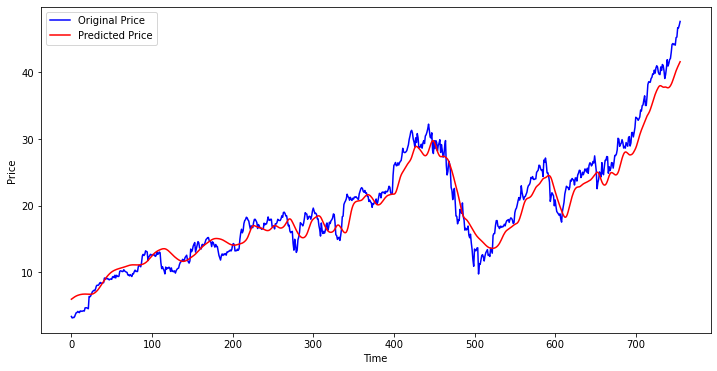

In [82]:
plt.figure(figsize = (12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()